## AlekseevDP (DSU-4, TSML-4)_HW #1_Знакомство с временными рядами

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

## Выведем сначала графики всех временных рядов

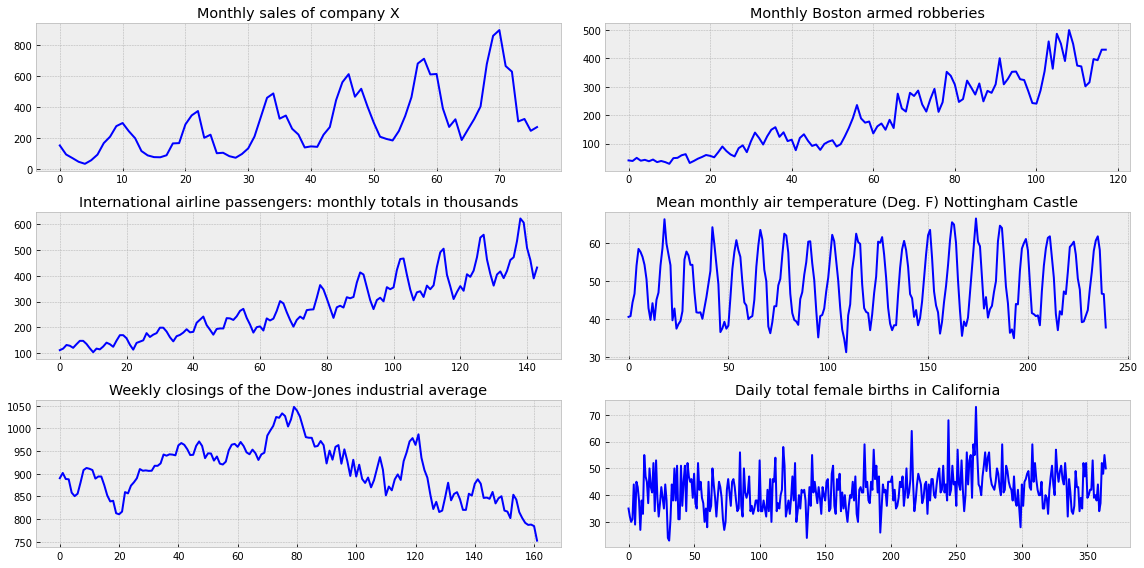

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

## Зададим функцию вывода коррелограмм

In [6]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Зададим функцию для проведения теста Дики-Фуллера

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

## 1. "Monthly sales of company X"

In [10]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


P-Value > 0.05, т.е. ряд нестационарен. Другими словами, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


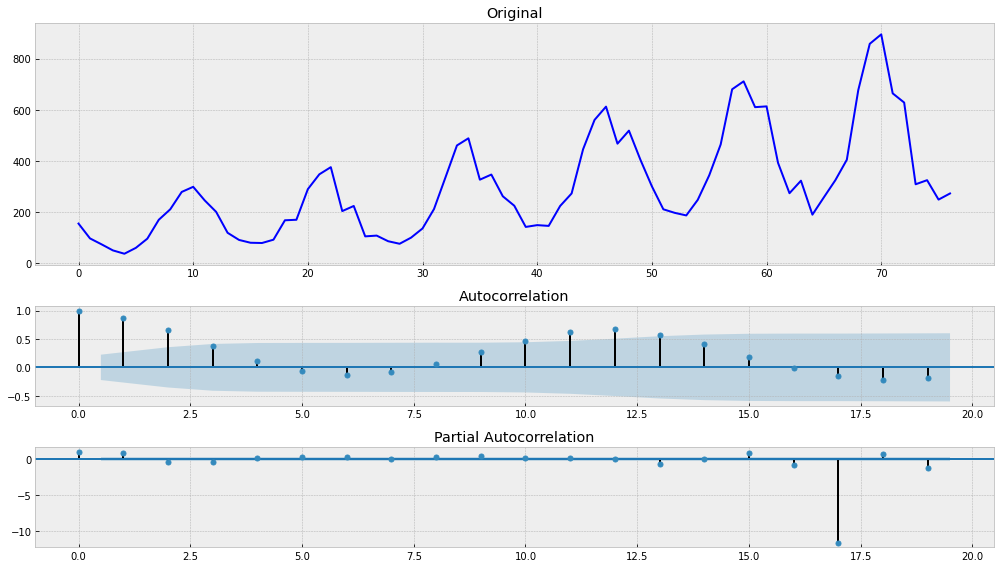

In [11]:
# Посмотрим на коррелограмму.
tsplot(all_series["Monthly sales of company X"])

 ## Из коррелограммы можно сделать вывод, что присутствуют сезонность и тренд, т.е. ряд нестационарен. Для приведения к стационарному виду сначала попробуем нормализовать при помощи преобразования Бокса-Кокса.

In [12]:
from scipy.stats import boxcox

In [13]:
series = boxcox(all_series["Monthly sales of company X"], 0)

In [14]:
# Проверим результат на стационарность тестом Дики-Фуллера:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


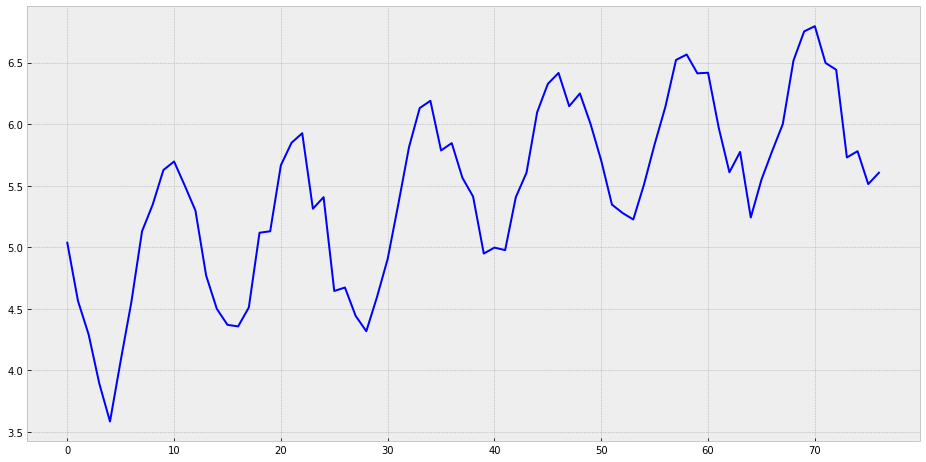

In [15]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

## P-Value всё равно больше 0.05, да и тренд с сезонностью остались. Поэтому попробуем применить дифференцирование.

In [16]:
series = np.diff(series, 1)

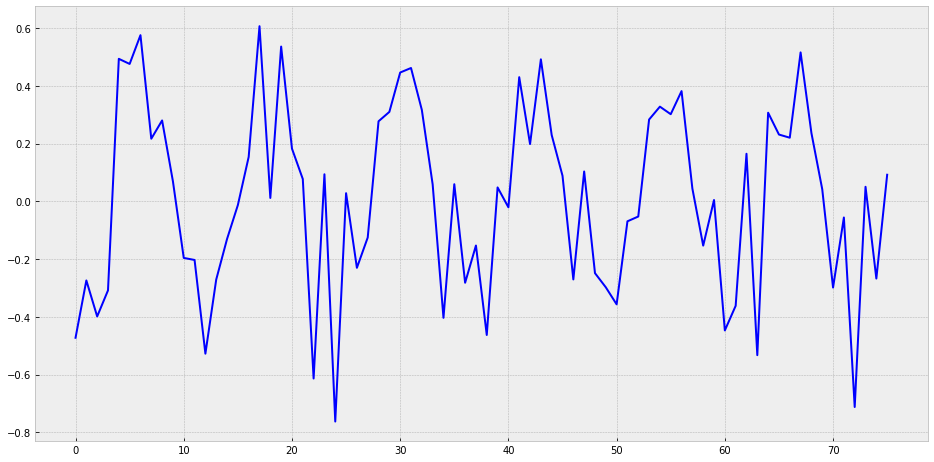

In [17]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [18]:
# Проверим результат на стационарность тестом Дики-Фуллера:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


## Значение P-value снизилось до 0.02, из графика ушел тренд и практически ушла сезонность. Можно сделать вывод, что ряд стал стационарным. 

## 2. "Monthly Boston armed robberies"

In [19]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


P-Value > 0.05, т.е. ряд нестационарен.

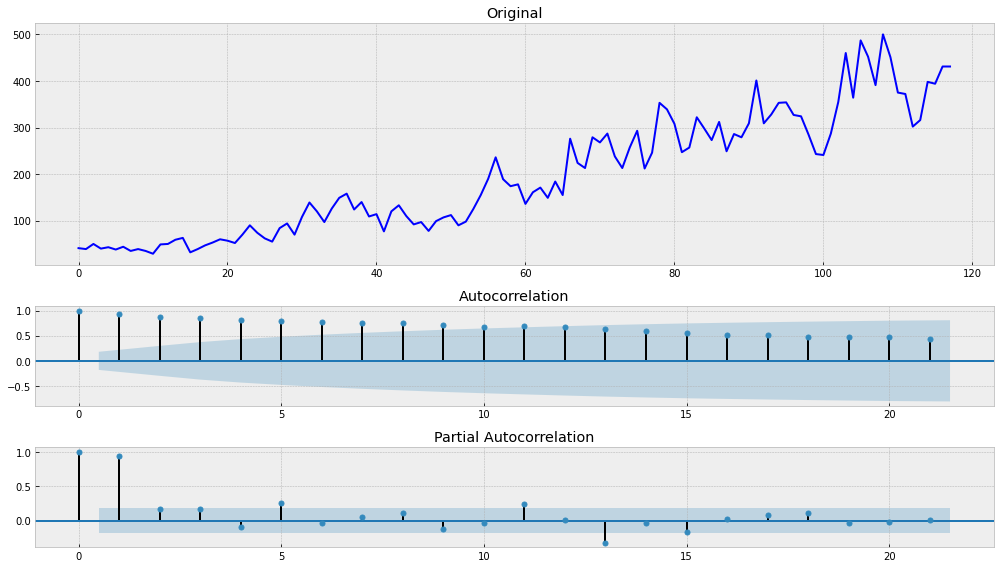

In [20]:
# Посмотрим на коррелограмму.
tsplot(all_series["Monthly Boston armed robberies"])

## Наблюдается тренд, сезонности не видно. Попробуем применить дифференцирование.

In [21]:
series = np.diff(all_series["Monthly Boston armed robberies"], 1)

In [22]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


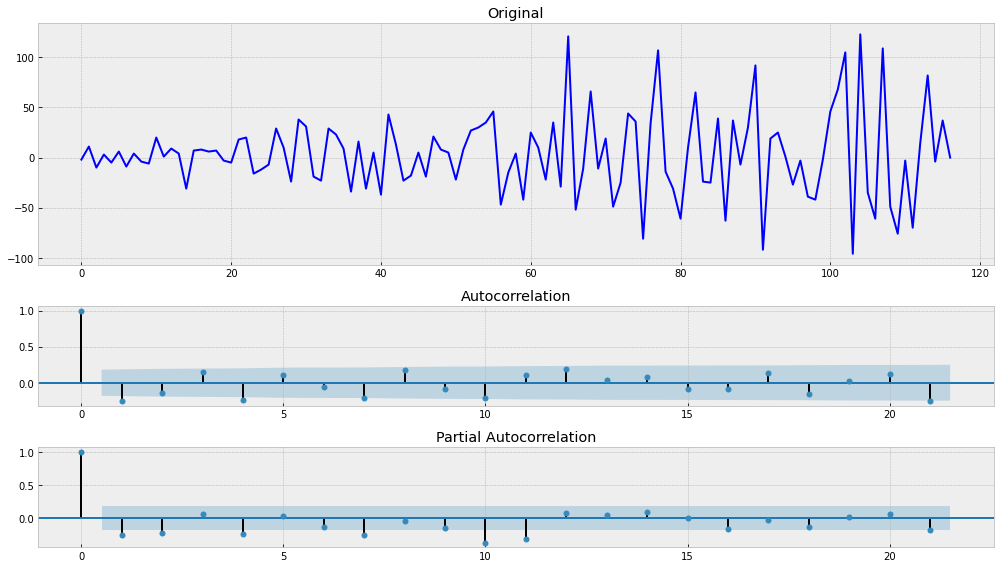

In [23]:
tsplot(series)

## P-value близко к нулю, тренд и сезонность ушли. Ряд стал стационарным.

## 3. "International airline passengers: monthly totals in thousands"

In [24]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


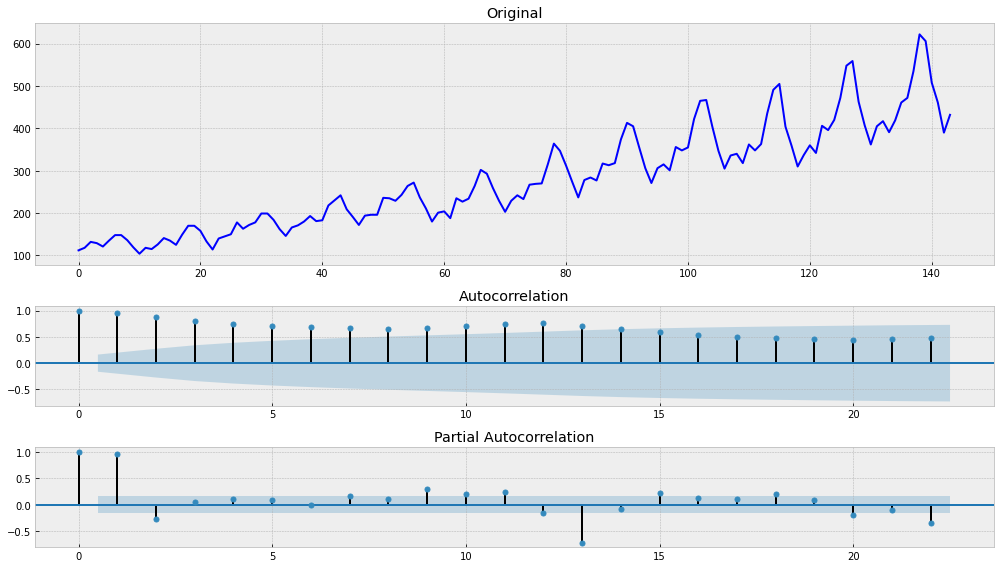

In [25]:
# Посмотрим на коррелограмму.
tsplot(all_series["International airline passengers: monthly totals in thousands"])

## Мы видим, что p-value больше 0.05, присутствуют тренд и сезонность, т.е. ряд нестационарен. Попробуем применить преобразование Бокса-Кокса.

In [26]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

In [27]:
# Проведем тест Дики-Фуллера
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [28]:
# Преобразование Бокса-Кокса не сработало, p-value осталось значительно больше 0.05. Попробуем дифференцирование с лагом 12, чтобы убрать сезонность.
series = series[12:] - series[:-12]

In [29]:
# Проведем тест Дики-Фуллера
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [30]:
# Дифференцирование помогло, но не окончательно, т.к. p-value осталось больше 0.05.
# Попробуем ещё раз продифференцировать с лагом 1
series = series[1:] - series[:-1]

In [31]:
# Проведем тест Дики-Фуллера
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


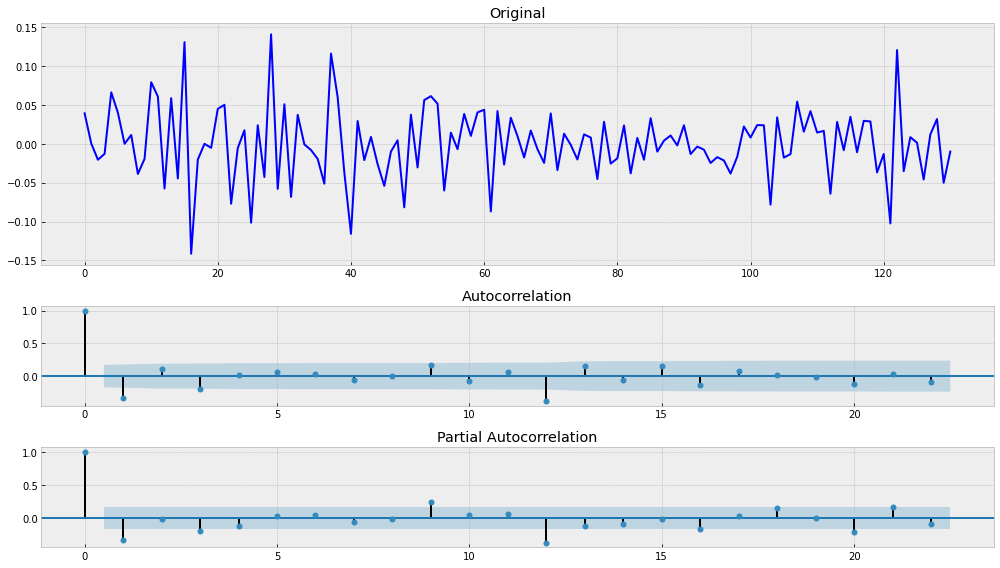

In [32]:
# Посмотрим на коррелограмму.
tsplot(series)

## Мы видим, что тренд и сезонность ушли, p-value близко к нулю. Ряд стал стационарным.

## 4. "Mean monthly air temperature (Deg. F) Nottingham Castle"

In [33]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


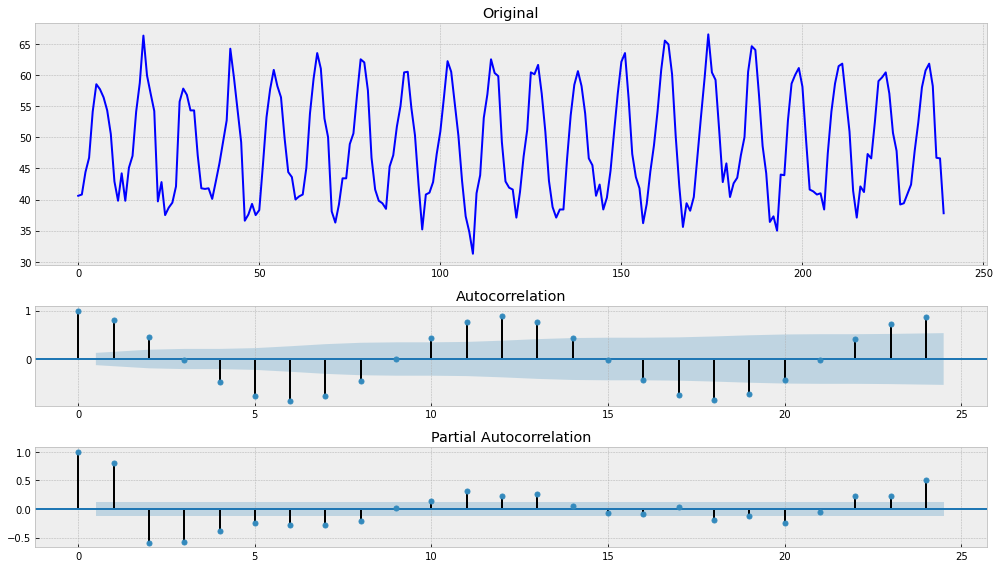

In [34]:
# Посмотрим на коррелограмму.
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

## Мы видим, что p-value меньше 0.05, но присутствует сезонность. Попробуем убрать её преобразованием Бокса-Кокса и дифференцированием с лагом 12 месяцев.

In [35]:
series = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)

In [36]:
series = series[12:] - series[:-12]

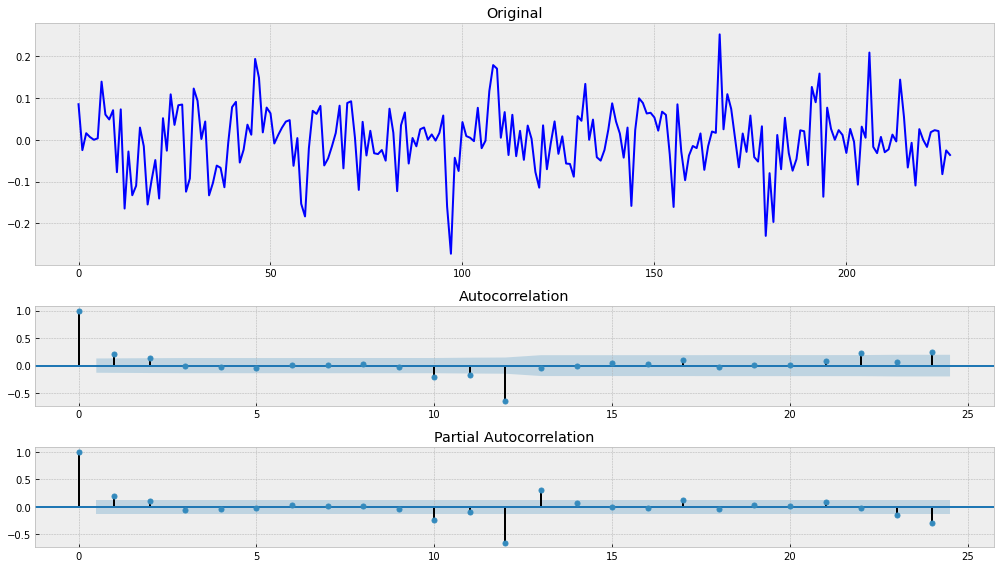

In [37]:
# Посмотрим на коррелограмму.
tsplot(series)

In [38]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


## Мы видим, что p-value снизилось почти до нуля, сезонность ушла. Ряд стал стационарным.

## 5. "Weekly closings of the Dow-Jones industrial average"

In [39]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


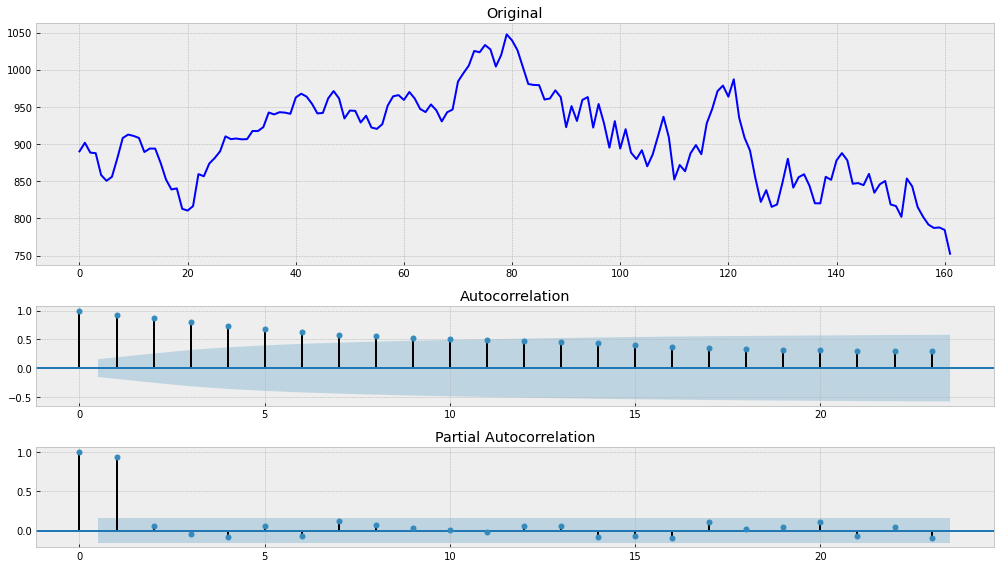

In [40]:
# Посмотрим на коррелограмму.
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

## Видно, что есть тренды, но сезонности не наблюдается. P-value больше 0.05, ряд нестационарен. Попробуем применить дифференцирование.

In [41]:
series = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)

In [42]:
# Проведем тест Дики-Фуллера
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


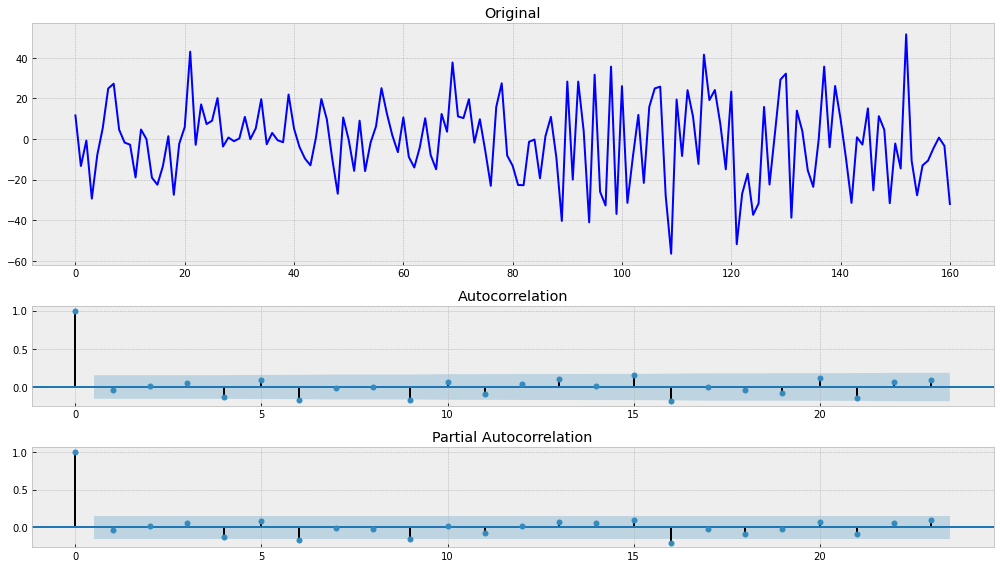

In [43]:
# Посмотрим на коррелограмму.
tsplot(series)

## P-value снизилось почти до нуля, тренды ушли. Ряд стал стационарным.

## 6. "Daily total female births in California"

In [44]:
# Проведем тест Дики-Фуллера
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


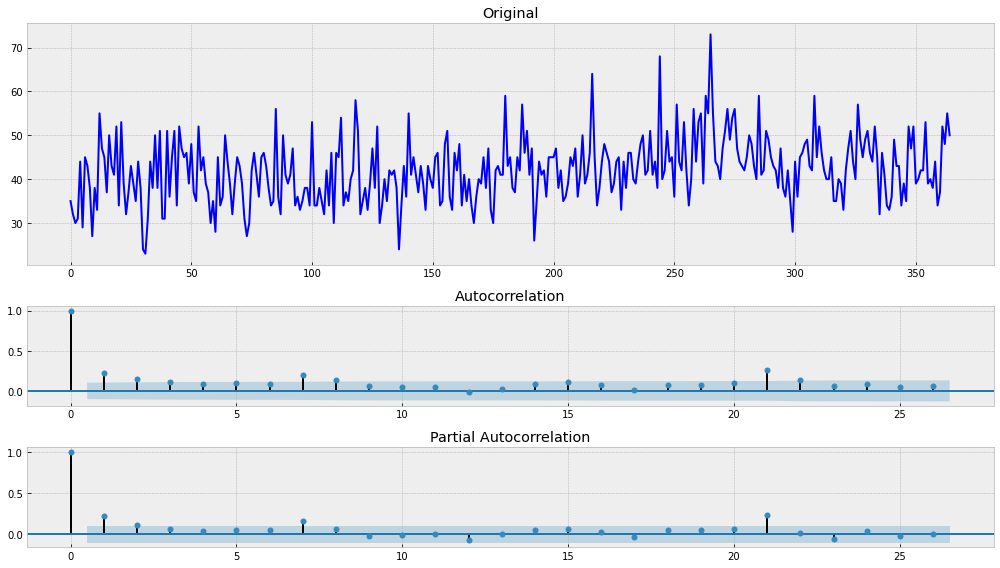

In [45]:
# Посмотрим на коррелограмму.
tsplot(all_series["Daily total female births in California"])

## Мы видим, что p-value близко к нулю, тренды и сезонность не прослеживаются, т.е. ряд уже можно признать стационарным.